# Estimating Average Effects

In [1]:
from matplotlib import pyplot as plt

from utils import read_and_transform_data, bci
from s_learner import calculate_measures_s_learner
from t_learner import calculate_measures_t_learner
from inverse_probability_weighting import calculate_measures_ipw
from propensity_score_matching import calculate_measures_matching
from doubly_robust import calculate_measures_doubly_robust

plt.style.use('ggplot')

In [2]:
DATA_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/code/data/processed_data.csv'
x, t, y = read_and_transform_data(DATA_PATH)
BOX_PLOTS_PATH  = '/Users/gurkeinan/semester6/Causal-Inference/Project/plots/box_plots.png'

## Covariate Adjustment

### S - Learner

In [3]:
s_learner_ate, s_learner_att, s_learner_atc = calculate_measures_s_learner(x, t, y)
print(f'S-Learner ATE: {s_learner_ate}')
print(f'S-Learner ATT: {s_learner_att}')
print(f'S-Learner ATC: {s_learner_atc}')

S-Learner ATE: -0.11338733494858279
S-Learner ATT: -0.1093129036642195
S-Learner ATC: -0.11630493053306423


In [4]:
s_learner_ate_ci, s_learner_att_ci, s_learner_atc_ci, bootstrap_s_learner_ate, bootstrap_s_learner_att, bootstrap_s_learner_atc = bci(x, t, y, calculate_measures_s_learner)
print(f'S-Learner ATE 95% CI: {s_learner_ate_ci}')
print(f'S-Learner ATT 95% CI: {s_learner_att_ci}')
print(f'S-Learner ATC 95% CI: {s_learner_atc_ci}')

S-Learner ATE 95% CI: [-0.14969942 -0.08424042]
S-Learner ATT 95% CI: [-0.15077086 -0.08463166]
S-Learner ATC 95% CI: [-0.14931836 -0.08302592]


### T - Learner

In [5]:
t_learner_ate, t_learner_att, t_learner_atc = calculate_measures_t_learner(x, t, y)
print(f'T-Learner ATE: {t_learner_ate}')
print(f'T-Learner ATT: {t_learner_att}')
print(f'T-Learner ATC: {t_learner_atc}')

T-Learner ATE: -0.12545043892096894
T-Learner ATT: -0.1308393070231296
T-Learner ATC: -0.12159160889466405


In [6]:
t_learner_ate_ci, t_learner_att_ci, t_learner_atc_ci, bootstrap_t_learner_ate, bootstrap_t_learner_att, bootstrap_t_learner_atc = bci(x, t, y, calculate_measures_t_learner)
print(f'T-Learner ATE 95% CI: {t_learner_ate_ci}')
print(f'T-Learner ATT 95% CI: {t_learner_att_ci}')
print(f'T-Learner ATC 95% CI: {t_learner_atc_ci}')

T-Learner ATE 95% CI: [-0.17604542 -0.10309056]
T-Learner ATT 95% CI: [-0.20156047 -0.09625099]
T-Learner ATC 95% CI: [-0.17284447 -0.09245421]


## Propensity Score Based Methods

### Inverse Probability Weighting

In [7]:
ipw_ate, ipw_att, ipw_atc = calculate_measures_ipw(x, t, y)
print(f'IPW ATE: {ipw_ate}')
print(f'IPW ATT: {ipw_att}')
print(f'IPW ATC: {ipw_atc}')

IPW ATE: -0.20556054011693647
IPW ATT: -0.17564022685731862
IPW ATC: -0.19976211825446882


In [8]:
ipw_ate_ci, ipw_att_ci, ipw_atc_ci, bootstrap_ipw_ate, bootstrap_ipw_att, bootstrap_ipw_atc = bci(x, t, y, calculate_measures_ipw)
print(f'IPW ATE 95% CI: {ipw_ate_ci}')
print(f'IPW ATT 95% CI: {ipw_att_ci}')
print(f'IPW ATC 95% CI: {ipw_atc_ci}')

IPW ATE 95% CI: [-0.22444132 -0.18406821]
IPW ATT 95% CI: [-0.21138821 -0.14563468]
IPW ATC 95% CI: [-0.23581815 -0.16738028]



### Propensity Based Matching

In [9]:
psm_ate, psm_att, psm_atc = calculate_measures_matching(x, t, y)
print(f'Propensity Score Matching ATE: {psm_ate}')
print(f'Propensity Score Matching ATT: {psm_att}')
print(f'Propensity Score Matching ATC: {psm_atc}')

Propensity Score Matching ATE: -0.21365075565053512
Propensity Score Matching ATT: -0.1862833761278545
Propensity Score Matching ATC: -0.23324783315203462


In [10]:
psm_ate_ci, psm_att_ci, psm_atc_ci, bootstrap_psm_ate, bootstrap_psm_att, bootstrap_PSM_atc = bci(x, t, y, calculate_measures_matching)
print(f'Propensity Score Matching ATE 95% CI: {psm_ate_ci}')
print(f'Propensity Score Matching ATT 95% CI: {psm_att_ci}')
print(f'Propensity Score Matching ATC 95% CI: {psm_atc_ci}')

Propensity Score Matching ATE 95% CI: [-0.29215583  0.11361129]
Propensity Score Matching ATT 95% CI: [-0.43393242  0.10171691]
Propensity Score Matching ATC 95% CI: [-0.33006567  0.23423862]



## Doubly Robust

In [11]:
dr_ate, dr_att, dr_atc = calculate_measures_doubly_robust(x, t, y)
print(f'Doubly Robust ATE: {dr_ate}')
print(f'Doubly Robust ATT: {dr_att}')
print(f'Doubly Robust ATC: {dr_atc}')

Doubly Robust ATE: -0.14068205317662597
Doubly Robust ATT: -0.04306739815702385
Doubly Robust ATC: -0.15995537454073774


In [12]:
dr_ate_ci, dr_att_ci, dr_atc_ci, bootstrap_dr_ate, bootstrap_dr_att, bootstrap_dr_atc = bci(x, t, y, calculate_measures_doubly_robust)
print(f'Doubly Robust ATE 95% CI: {dr_ate_ci}')
print(f'Doubly Robust ATT 95% CI: {dr_att_ci}')
print(f'Doubly Robust ATC 95% CI: {dr_atc_ci}')

Doubly Robust ATE 95% CI: [-0.22207744 -0.10868544]
Doubly Robust ATT 95% CI: [-0.213001   -0.02861528]
Doubly Robust ATC 95% CI: [-0.24075939 -0.1099648 ]


# Boxplot of ATE, ATT, and ATC estimates

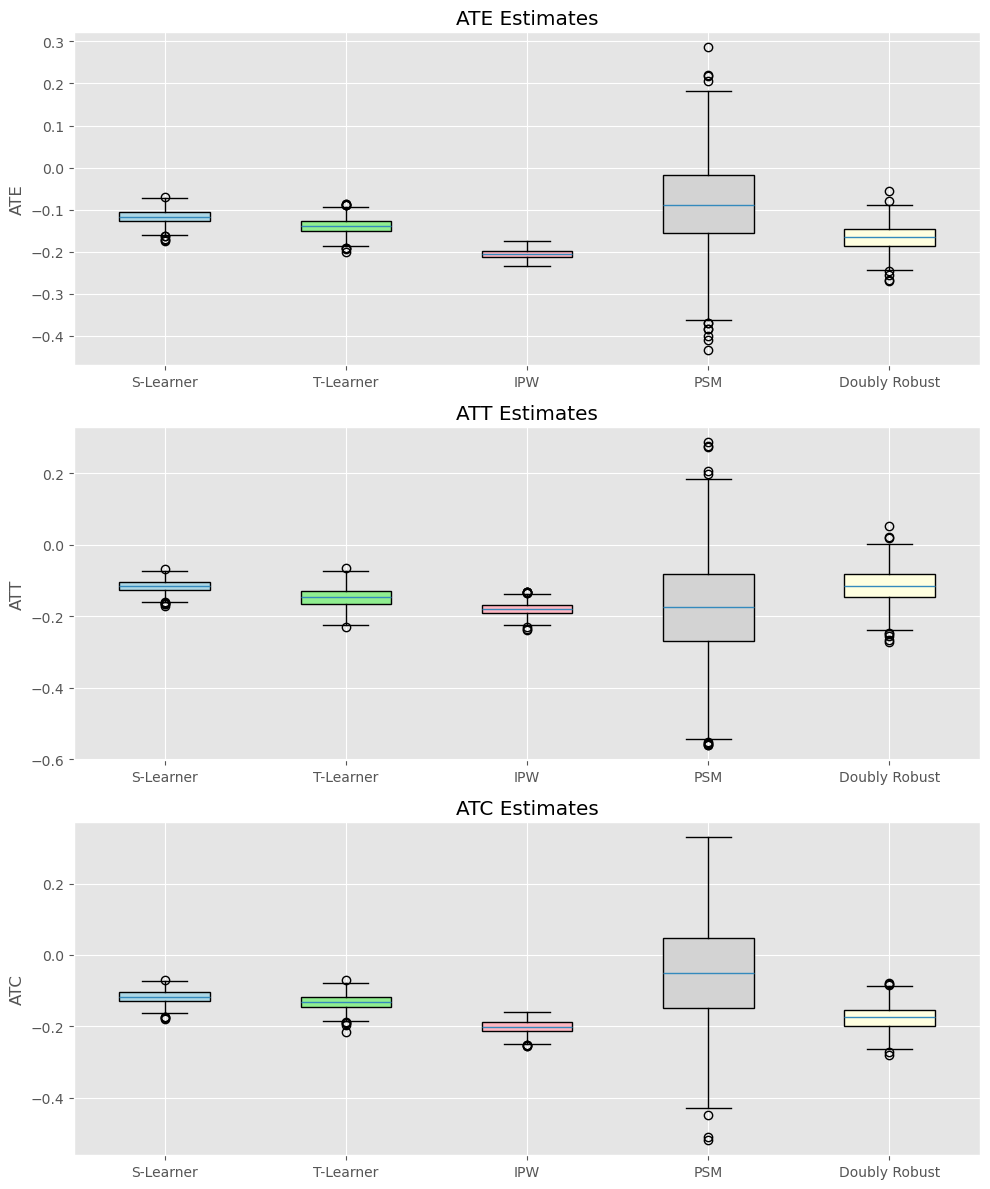

In [13]:
# Plot the ATE, ATT, and ATC estimates for each method
bootstrap_ate_values = [bootstrap_s_learner_ate, bootstrap_t_learner_ate, bootstrap_ipw_ate, bootstrap_psm_ate, bootstrap_dr_ate]
bootstrap_att_values = [bootstrap_s_learner_att, bootstrap_t_learner_att, bootstrap_ipw_att, bootstrap_psm_att, bootstrap_dr_att]
bootstrap_atc_values = [bootstrap_s_learner_atc, bootstrap_t_learner_atc, bootstrap_ipw_atc, bootstrap_PSM_atc, bootstrap_dr_atc]

ate_cis = [s_learner_ate_ci, t_learner_ate_ci, ipw_ate_ci, psm_ate_ci, dr_ate_ci]
att_cis = [s_learner_att_ci, t_learner_att_ci, ipw_att_ci, psm_att_ci, dr_att_ci]
atc_cis = [s_learner_atc_ci, t_learner_atc_ci, ipw_atc_ci, psm_atc_ci, dr_atc_ci]

colors = ['lightblue', 'lightgreen', 'lightpink', 'lightgrey', 'lightyellow']
method_names = ['S-Learner', 'T-Learner', 'IPW', 'PSM', 'Doubly Robust']

plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
boxes_ate = plt.boxplot(bootstrap_ate_values, patch_artist=True, labels=list(method_names))
for patch, color in zip(boxes_ate['boxes'], colors):
    patch.set_facecolor(color)
plt.title('ATE Estimates')
plt.ylabel('ATE')

plt.subplot(3, 1, 2)
boxes_att = plt.boxplot(bootstrap_att_values, patch_artist=True, labels=list(method_names))
for patch, color in zip(boxes_att['boxes'], colors):
    patch.set_facecolor(color)
plt.title('ATT Estimates')
plt.ylabel('ATT')

plt.subplot(3, 1, 3)
boxes_atc = plt.boxplot(bootstrap_atc_values, patch_artist=True, labels=list(method_names))
for patch, color in zip(boxes_atc['boxes'], colors):
    patch.set_facecolor(color)
plt.title('ATC Estimates')
plt.ylabel('ATC')

plt.subplots_adjust(hspace=0.8)
plt.tight_layout()

# Save the box plots
plt.savefig(BOX_PLOTS_PATH)

plt.show()

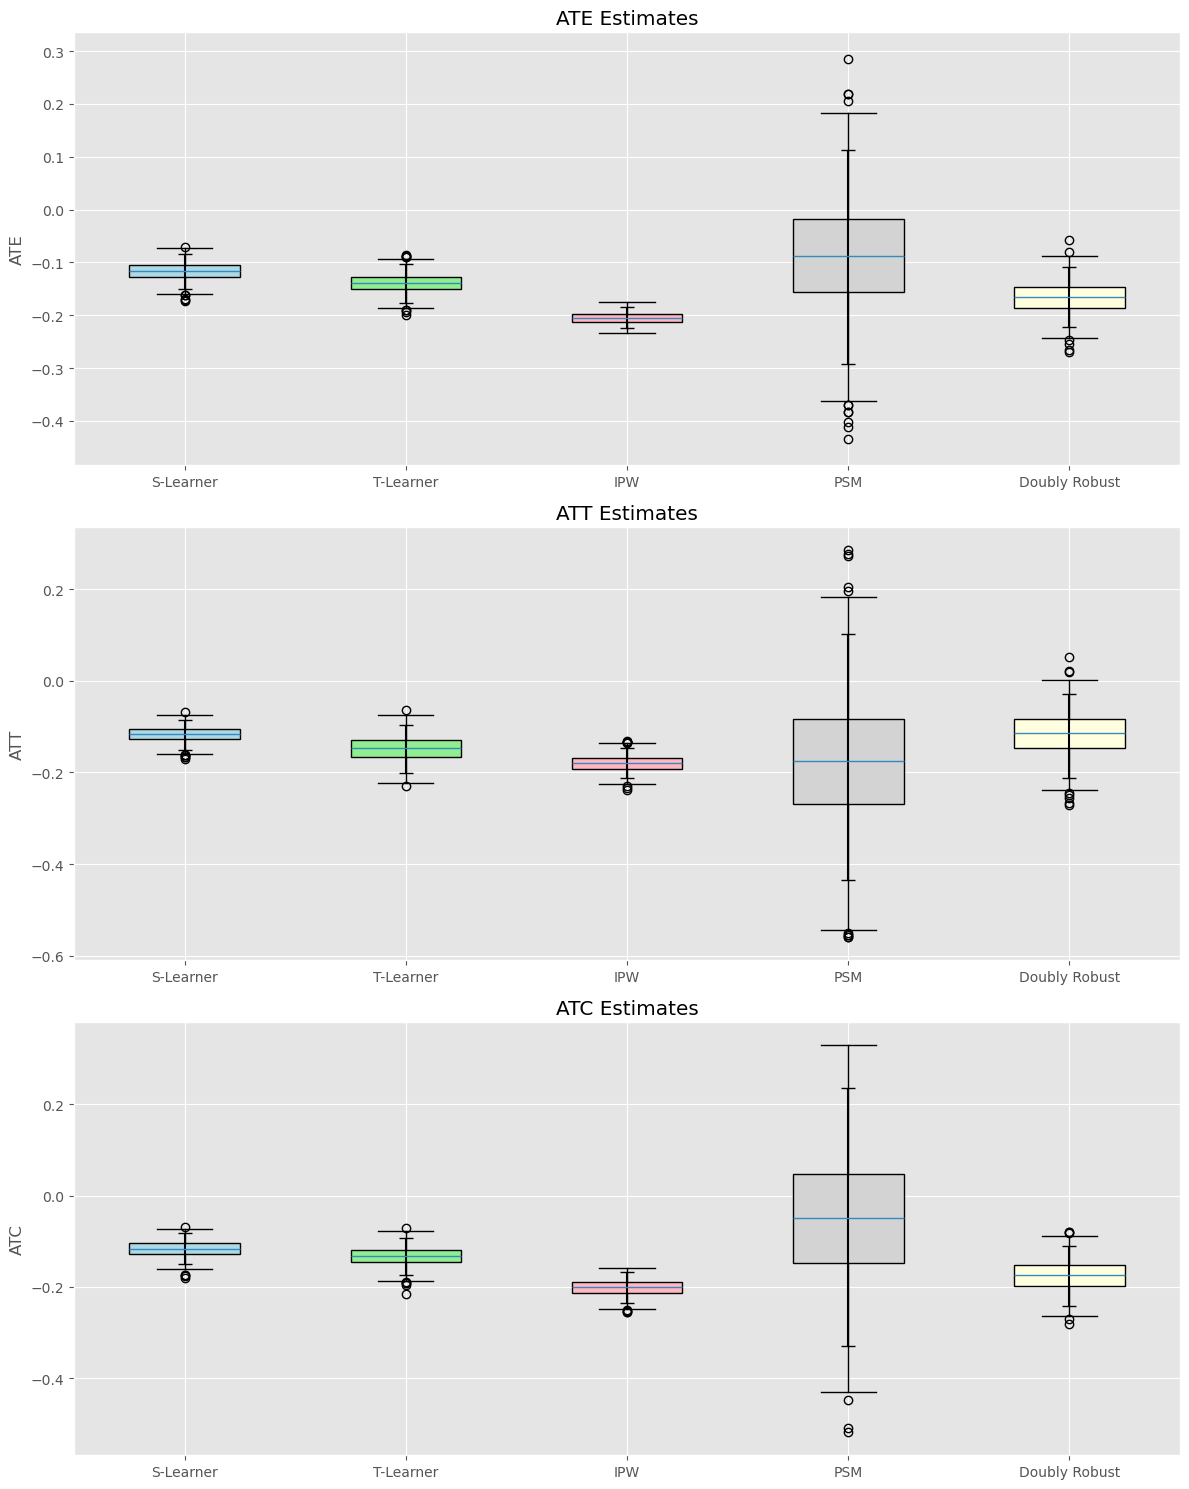

In [14]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['lightblue', 'lightgreen', 'lightpink', 'lightgrey', 'lightyellow']
method_names = ['S-Learner', 'T-Learner', 'IPW', 'PSM', 'Doubly Robust']

plt.figure(figsize=(12, 15))

def plot_boxplot_with_ci(ax, data, cis, title, ylabel):
    boxes = ax.boxplot(data, patch_artist=True, labels=method_names)
    for patch, color in zip(boxes['boxes'], colors):
        patch.set_facecolor(color)

    # Adding error bars for CIs
    positions = range(1, len(method_names) + 1)
    for i, (ci, pos) in enumerate(zip(cis, positions)):
        mid = np.mean(ci)
        err = [mid - ci[0], ci[1] - mid]
        ax.errorbar(pos, mid, yerr=np.array(err).reshape(2,1), fmt='k', capsize=5)

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim(min(min(d) for d in data) - 0.05, max(max(d) for d in data) + 0.05)

plt.subplot(3, 1, 1)
plot_boxplot_with_ci(plt.gca(), bootstrap_ate_values, ate_cis, 'ATE Estimates', 'ATE')

plt.subplot(3, 1, 2)
plot_boxplot_with_ci(plt.gca(), bootstrap_att_values, att_cis, 'ATT Estimates', 'ATT')

plt.subplot(3, 1, 3)
plot_boxplot_with_ci(plt.gca(), bootstrap_atc_values, atc_cis, 'ATC Estimates', 'ATC')

plt.tight_layout()
plt.savefig(BOX_PLOTS_PATH)
plt.show()